In [3]:
import pandas as pd
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Credentials
#EDIT WITH YOUR KEYS FROM YOU CONFIG FILE
from keys import client_id
from keys import client_id_secret
client_id=client_id
client_secret=client_id_secret

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
# ***** THIS CODE BLOCK READS ALL 1400+ SPOTIFY PLAYLISTS, IT HAS NO SET LIMIT *****

# This code returns a dictionary, the keys are playlist titles
# The values are dictionaries containing the audio feature data for each song in the playlist

# Make an empty dictionary for later population with data
total_playlist_dict = {}

# Start making API calls, generate a list of playlist ID's and names 
playlists = sp.user_playlists("spotify")

playlist_ids=[]
playlist_names=[]

while playlists:
    for i, playlist in enumerate(playlists['items']):
        # print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
        playlist_ids.append(playlist['id'])
        playlist_names.append(playlist['name'])
        playlist
        
    if playlists['next']:
        playlists = sp.next(playlists)
        
    else:
        playlists = None
        
# Cycle through the playlists in playlist_ids
# Extract the songs in each playlist
for (ID, name) in zip(playlist_ids, playlist_names):
    playlist1 = sp.user_playlist_tracks(user="spotify", playlist_id=ID, fields=None, limit=100, offset=0, market=None)

    # Create lists to store song ID's and song names 
    song_ids = []
    song_names = []
    for i in range(len(playlist1["items"])):
        
        # Try/Except to avoid TypeError
        try:
            song_id = playlist1["items"][i]["track"]["id"]
            
        except TypeError:
            print("TypeError, skipping")
            continue
            
        song_name = playlist1["items"][i]["track"]["name"]
        song_ids.append(song_id)
        song_names.append(song_name)
        
    # Create empty lists to store Spotify's audio features and song name
    danceability = []
    energy = []
    speechiness = []
    acousticness = []
    tempo = []
    instrumentalness = []
    liveness = []
    loudness = []
    duration_ms = []
    key = []
    mode = []
    valence = []

    # Loop though list of song ID's
    for track in song_ids:
        track_features = sp.audio_features(tracks = track)
    
        # Append audio features to respective lists
        # Try/Except to avoid TypeError
        try:
            danceability.append(track_features[0]["danceability"])
            energy.append(track_features[0]["energy"])
            speechiness.append(track_features[0]["speechiness"])
            acousticness.append(track_features[0]["acousticness"])
            tempo.append(track_features[0]["tempo"])
            instrumentalness.append(track_features[0]["instrumentalness"])
            liveness.append(track_features[0]["liveness"])
            loudness.append(track_features[0]["loudness"])
            duration_ms.append(track_features[0]["duration_ms"])
            key.append(track_features[0]["key"])
            mode.append(track_features[0]["mode"])
            valence.append(track_features[0]["valence"])
            
        except TypeError:
            print("TypeError, skipping")
            continue
        
    # Place the listed data into a dictionary
    playlist_dict = {
        "Name":song_names,
        "Danceability":danceability,
        "Energy":energy,
        "Speechiness":speechiness,
        "Acousticness":acousticness,
        "Tempo":tempo,
        "Instrumentalness":instrumentalness,
        "Liveness":liveness,
        "Loudness":loudness,
        "Duration(ms)":duration_ms,
        "Key":key,
        "Mode":mode,
        "Valence":valence
    }
    
    # Compile the data dictionaries into final dictionary with playlist titles as keys
    total_playlist_dict.update({name:playlist_dict})

retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
TypeError, skipping
TypeError, skipping
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retryi

KeyboardInterrupt: 

In [5]:
len(total_playlist_dict)

265

In [6]:
# This code will return a list of the playlists in the dictionary after running the above code block
for key in total_playlist_dict.keys():
    print(key)

Today's Top Hits
RapCaviar
mint
Are & Be
Rock This
Hot Country
¡Viva Latino!
New Music Friday
Afternoon Acoustic
Peaceful Piano
Roots Rising
Lost In Austin: Country Music from SXSW
SXSW: HipHopUpNext
Music Inspired By Mogul
SXSW 2017: Daily Guide
TGIF
Women of Experimental
We Here
This Is: Jason Isbell
This Is Disney
This Is The Doors
This Is AC/DC
This Is Adele
This Is Al Green
This Is alt-J
This Is: Aqua
This Is Aretha Franklin
This Is Bee Gees
This Is blink-182
This Is Bruno Mars
This is: Carole King
This is: Deep Purple
This Is Depeche Mode
This Is: Dispatch
This Is Ed Sheeran
This Is Future
This Is: George Michael
This Is: Gillian Welch
This Is James Arthur
This is: Jamiroquai
This Is John Mayer
This Is: John Legend
This Is Justin Bieber
This Is Lady Gaga
This Is LANY
This Is Laura Marling
This Is:  Miranda Lambert
This Is Muse
This Is Neil Young
This Is Nina Simone
This Is New Edition
This Is One Direction
This Is OneRepublic
This is: Raffi
This Is Prince
This Is: Rag'n'Bone Man


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

spice_girls = pd.DataFrame(total_playlist_dict["This Is Spice Girls"])
radio_head = pd.DataFrame(total_playlist_dict["This Is Radiohead"])
rihanna = pd.DataFrame(total_playlist_dict["This Is Rihanna"])
drake = pd.DataFrame(total_playlist_dict["This Is Drake"])
elton_john = pd.DataFrame(total_playlist_dict["This Is Elton John"])
beach_boys = pd.DataFrame(total_playlist_dict["This Is The Beach Boys"])

todays_hits = pd.DataFrame(total_playlist_dict["Today's Top Hits"])
rock_this = pd.DataFrame(total_playlist_dict["Rock This"])


In [8]:
todays_hits.head()

,Name,Danceability,Energy,Speechiness,Acousticness,Tempo,Instrumentalness,Liveness,Loudness,Duration(ms),Key,Mode,Valence
0,Dancing With A Stranger (with Normani),0.741,0.520,0.0656,0.4500,102.998,0.000002,0.2220,-7.513,171030,8,1,0.347
1,Without Me,0.752,0.488,0.0705,0.2970,136.041,0.000009,0.0936,-7.050,201661,6,1,0.533
2,Wow.,0.833,0.539,0.1780,0.1630,99.947,0.000002,0.1010,-7.399,149520,11,0,0.385
3,Lost in the Fire (feat. The Weeknd),0.663,0.675,0.0359,0.0863,101.004,0.001330,0.1170,-12.159,202093,2,1,0.176
4,Saturday Nights,0.540,0.439,0.1150,0.6350,167.908,0.000019,0.0993,-8.591,209547,10,1,0.371


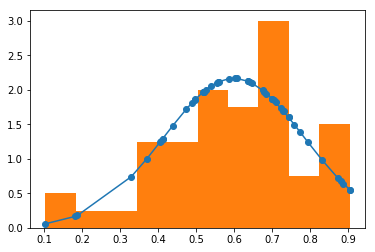

In [9]:
import numpy as np
import scipy.stats as stats
import pylab as pl

data = sorted(todays_hits["Energy"])

fit = stats.norm.pdf(data, np.mean(data), np.std(data))

pl.plot(data, fit, '-o')

pl.hist(data, density=True)

pl.show()

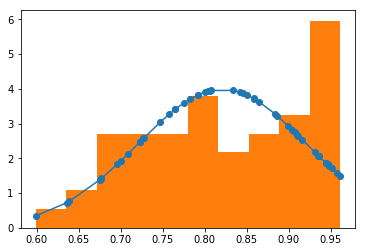

In [10]:
data = sorted(rock_this["Energy"])

fit = stats.norm.pdf(data, np.mean(data), np.std(data))

pl.plot(data, fit, '-o')

pl.hist(data, density=True)

pl.show()

In [11]:
np.mean(todays_hits["Energy"])

0.5995599999999998

In [12]:
np.mean(rock_this["Energy"])

0.8207843137254898

In [13]:
stats.ttest_ind(todays_hits["Energy"], rock_this["Energy"])

Ttest_indResult(statistic=-7.445114623449916, pvalue=3.630015352625357e-11)

Are Spotify's measures of 'energy' and 'danceability' positively correlated?

Hypothesis:

If the mean 'energy' of a playlist's songs is higher than 0.5, then the playlist's mean 'danceability' will increase.

Null:

If the mean 'energy' of a playlist's songs is not higher than 0.5, then the playlist's mean 'danceability' will not increase.


In [14]:
stats.ttest_ind(todays_hits["Energy"], todays_hits["Danceability"])

Ttest_indResult(statistic=-2.673047048747376, pvalue=0.008805686836279783)

The attributes we want to test:

Speechiness, instrumentalness, positively correlated
Liveness, loudness, positively correlated 
Tempo, loudness, positively correlated
Acoustiness, energy, negative correlation
Speechiness, tempo, negative correlation


In [16]:
# Code for running statistical tests
# Create empty lists to store the means for the chosen audio features
speechiness_avgs = []
instrumentalness_avgs = []
danceability_avgs = []
tempo_avgs = []
acousticness_avgs = []
liveness_avgs = []
loudness_avgs = []
energy_avgs = []
mode_avgs = []
duration_avgs = []
valence_avgs = []


# Loop through dictionary, pull playlists and store select audio features
for key in total_playlist_dict.keys():
    entry = total_playlist_dict[key]
    speechiness_avgs.append(np.mean(entry["Speechiness"]))
    instrumentalness_avgs.append(np.mean(entry["Instrumentalness"]))
    danceability_avgs.append(np.mean(entry["Danceability"]))
    tempo_avgs.append(np.mean(entry["Tempo"]))
    acousticness_avgs.append(np.mean(entry["Acousticness"]))
    liveness_avgs.append(np.mean(entry["Liveness"]))
    loudness_avgs.append(np.mean(entry["Loudness"]))
    energy_avgs.append(np.mean(entry["Energy"]))
    mode_avgs.append(np.mean(entry["Mode"]))
    duration_avgs.append(np.mean(entry["Duration(ms)"]))
    valence_avgs.append(np.mean(entry["Valence"]))
    
# Find the measure of correlation 
stats.pearsonr(tempo_avgs, loudness_avgs)
    
    

(0.4408252136625449, 5.01910611591029e-14)

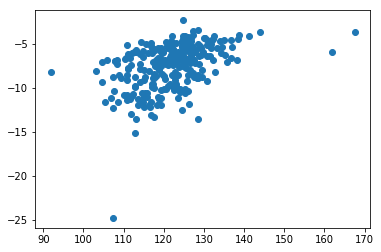

In [17]:
plt.scatter(tempo_avgs, loudness_avgs)
plt.show()